<a href="https://colab.research.google.com/github/catafest/colab_google/blob/master/catafest_020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
!pip install pytube
!pip install matplotlib
!pip install tensorflow-io

Tensorflow 2.0 has eager_execution enabled by default and so there is no need for you to run tf.enable_eager_execution. No need to run this if you want to test with versions below 2.0 should you enable eager execution. The next source code in puthon check teh version.

In [46]:
import tensorflow as tf
tf_ver = tf.version.VERSION[:1]
if (int(tf_ver) < 2):
  tf.enable_eager_execution()
  # Check eager execution is enabled
  print(tf.executing_eagerly())        # => True
else: print("You have this new version of Tensorflow: " + tf.version.VERSION )


You have this new version of Tensorflow: 2.6.0


A simple example for download youtube audio.

In [47]:
from pytube import YouTube

link=[
  "https://www.youtube.com/watch?v=GFfJADWhBFM", 
  "https://www.youtube.com/watch?v=RenwgvNngys",
]

for i in link: 
  s = YouTube(i)
  #print(i)
  #filename=s.streams.filter(res="720p",mime_type="video/mp4").first().download() 
  filename=s.streams.filter(only_audio=True).first().download() 
  print(filename)

/content/Zaf-Python/Diana Krall - Crazy.mp4
/content/Zaf-Python/The Moon Song - Karen O (lyrics).mp4


I cannot used with **tfio.audio.decode_aac**,  because of this error: **unable to open file memory as mp4 [Op:IO>AudioDecodeAAC]**



In [48]:
!pip install youtube-dl 


In [49]:
YOUTUBE_ID = "GFfJADWhBFM"
WAV_FILE = "./{}_converted.wav".format(YOUTUBE_ID)

!youtube-dl --no-continue --extract-audio --audio-format wav -o "%(id)s.%(ext)s" $YOUTUBE_ID
!ffmpeg -y -i {YOUTUBE_ID}.wav -acodec pcm_s16le -ar 16000 -ac 1 $WAV_FILE


[youtube] GFfJADWhBFM: Downloading webpage
[download] Destination: GFfJADWhBFM.webm
[download] 100% of 4.49MiB in 00:00
[ffmpeg] Destination: GFfJADWhBFM.wav
Deleting original file GFfJADWhBFM.webm (pass -k to keep)
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-

These are plot for audio file 

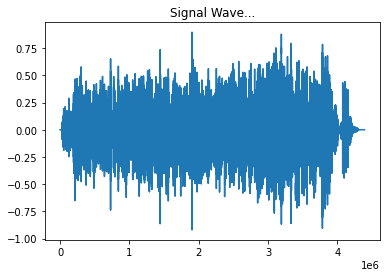

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


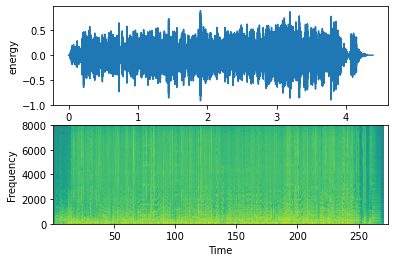

In [50]:
import soundfile as sf
import matplotlib.pyplot as plt
signal, fs = sf.read(WAV_FILE)
plt.figure(1)
plt.title("Signal Wave...")
plt.plot(signal)
plt.show()

plt.figure(1)
plot_a = plt.subplot(211)
plot_a.plot(signal)
plot_a.set_xlabel('sample rate * time')
plot_a.set_ylabel('energy')
sample_rate = 16000
plot_b = plt.subplot(212)
plot_b.specgram(signal, NFFT=1024, Fs=sample_rate, noverlap=900)
plot_b.set_xlabel('Time')
plot_b.set_ylabel('Frequency')
plt.show()
